# Box office Prediction


## Project definition:

To try and build a model to predict for a given movie its overall worldwide Box Office revenue.
The data set includes past movies with information about them including the cast, the director, plot keywords… And of course, for the training data points we have the classification (total Box office revenue)

## Data Exploration:

First step to start with is always to explore the data set we are given. This will include independently analyzing each of the features, finding correlations between them, dimensionality reduction and feature selection.

In [1]:
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np
import ast
import matplotlib.pyplot as plt

### Features:

The features we have in the data set are:

In [2]:
train_set = pd.read_csv('data/train.csv')
test_set = pd.read_csv('data/test.csv')
train_set.columns

Index([u'id', u'belongs_to_collection', u'budget', u'genres', u'homepage',
       u'imdb_id', u'original_language', u'original_title', u'overview',
       u'popularity', u'poster_path', u'production_companies',
       u'production_countries', u'release_date', u'runtime',
       u'spoken_languages', u'status', u'tagline', u'title', u'Keywords',
       u'cast', u'crew', u'revenue'],
      dtype='object')

Some of these features have strings values, 
others are lists of dictionaries displayed as strings.
We will convert these features to python dictionaries for ease of access.

In [3]:
LIST_COLS = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def convert_text_cols_to_list(df):
    for col in LIST_COLS:
        df[col] = [{} if pd.isna(value) else ast.literal_eval(value) for value in df[col]]
    return df

train_set = convert_text_cols_to_list(train_set)
test_set = convert_text_cols_to_list(test_set)

In [4]:
train_set.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,[{u'backdrop_path': u'/noeTVcgpBiD48fDjFVic1Vz...,14000000,"[{u'id': 35, u'name': u'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{u'name': u'Paramount Pictures', u'id': 4}, {...","[{u'iso_3166_1': u'US', u'name': u'United Stat...",2/20/15,93.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{u'id': 4379, u'name': u'time travel'}, {u'id...","[{u'name': u'Rob Corddry', u'gender': 2, u'cha...","[{u'name': u'Kelly Cantley', u'gender': 0, u'd...",12314651
1,2,[{u'backdrop_path': u'/zSEtYD77pKRJlUPx34BJgUG...,40000000,"[{u'id': 35, u'name': u'Comedy'}, {u'id': 18, ...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{u'name': u'Walt Disney Pictures', u'id': 2}]","[{u'iso_3166_1': u'US', u'name': u'United Stat...",8/6/04,113.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{u'id': 2505, u'name': u'coronation'}, {u'id'...","[{u'name': u'Anne Hathaway', u'gender': 1, u'c...","[{u'name': u'Garry Marshall', u'gender': 2, u'...",95149435


Now we’ll go through each of these features and analyze their potentional contribution to the classification/their correlations with other features, and possibly construct new features using the existing ones

#### i.	Genres feature:
As we can see from the table above, movies might belong to more than one genre, the values for this feature are a list which its elements are dictionaries with a genre id and a genre name. for example the movie with the id 2 belongs to genres Comedy (genre id 35), Drama(genre id 18), Family (genre id 10751) and Romance (genre id 10749).
	


In [5]:
train_set["genres"][1]

[{'id': 35, 'name': 'Comedy'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 10749, 'name': 'Romance'}]

The genre id will probably not be helpful for extracting information about the movie, it is just an overhead. 
We could use the genre id *instead* of using the genre name, we prefer to use the names since it is easier to comprehend.

Since we can’t define any order for genres, a good approach for dealing with such a nominal feature is to transform it to a group of “dummy” binary features. I.e. each feature will indicate whether or not the movie belongs to the specific genre.
For example: The movie with the id 2 will have the value 1 for the newly constructed features genre_name_comedy, genre_name_drama, genre_name_family and genre_name_romance, and 0 in all the other “genre_name_” feature.

In [6]:
genre_names_with_repetions = list(x["name"] for l in train_set["genres"] for x in l)
genre_names_with_repetions

['Comedy',
 'Comedy',
 'Drama',
 'Family',
 'Romance',
 'Drama',
 'Thriller',
 'Drama',
 'Action',
 'Thriller',
 'Animation',
 'Adventure',
 'Family',
 'Horror',
 'Thriller',
 'Documentary',
 'Action',
 'Comedy',
 'Music',
 'Family',
 'Adventure',
 'Comedy',
 'Music',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Crime',
 'Action',
 'Thriller',
 'Science Fiction',
 'Mystery',
 'Action',
 'Crime',
 'Drama',
 'Horror',
 'Thriller',
 'Drama',
 'Romance',
 'Comedy',
 'Romance',
 'Action',
 'Thriller',
 'Crime',
 'Adventure',
 'Family',
 'Science Fiction',
 'Horror',
 'Thriller',
 'Thriller',
 'Horror',
 'Thriller',
 'Mystery',
 'Foreign',
 'Horror',
 'Comedy',
 'Comedy',
 'Horror',
 'Mystery',
 'Thriller',
 'Crime',
 'Drama',
 'Mystery',
 'Thriller',
 'Drama',
 'Comedy',
 'Romance',
 'Animation',
 'Action',
 'Adventure',
 'Crime',
 'Thriller',
 'Drama',
 'Comedy',
 'Mystery',
 'Drama',
 'Thriller',
 'Fantasy',
 'Action',
 'Adventure',
 'Horror',
 'Action',
 'Comedy',
 'Crime',
 'Thriller',
 

Just before we jump into constructing the new dummy features, let's have a look at the popularity of each genre.

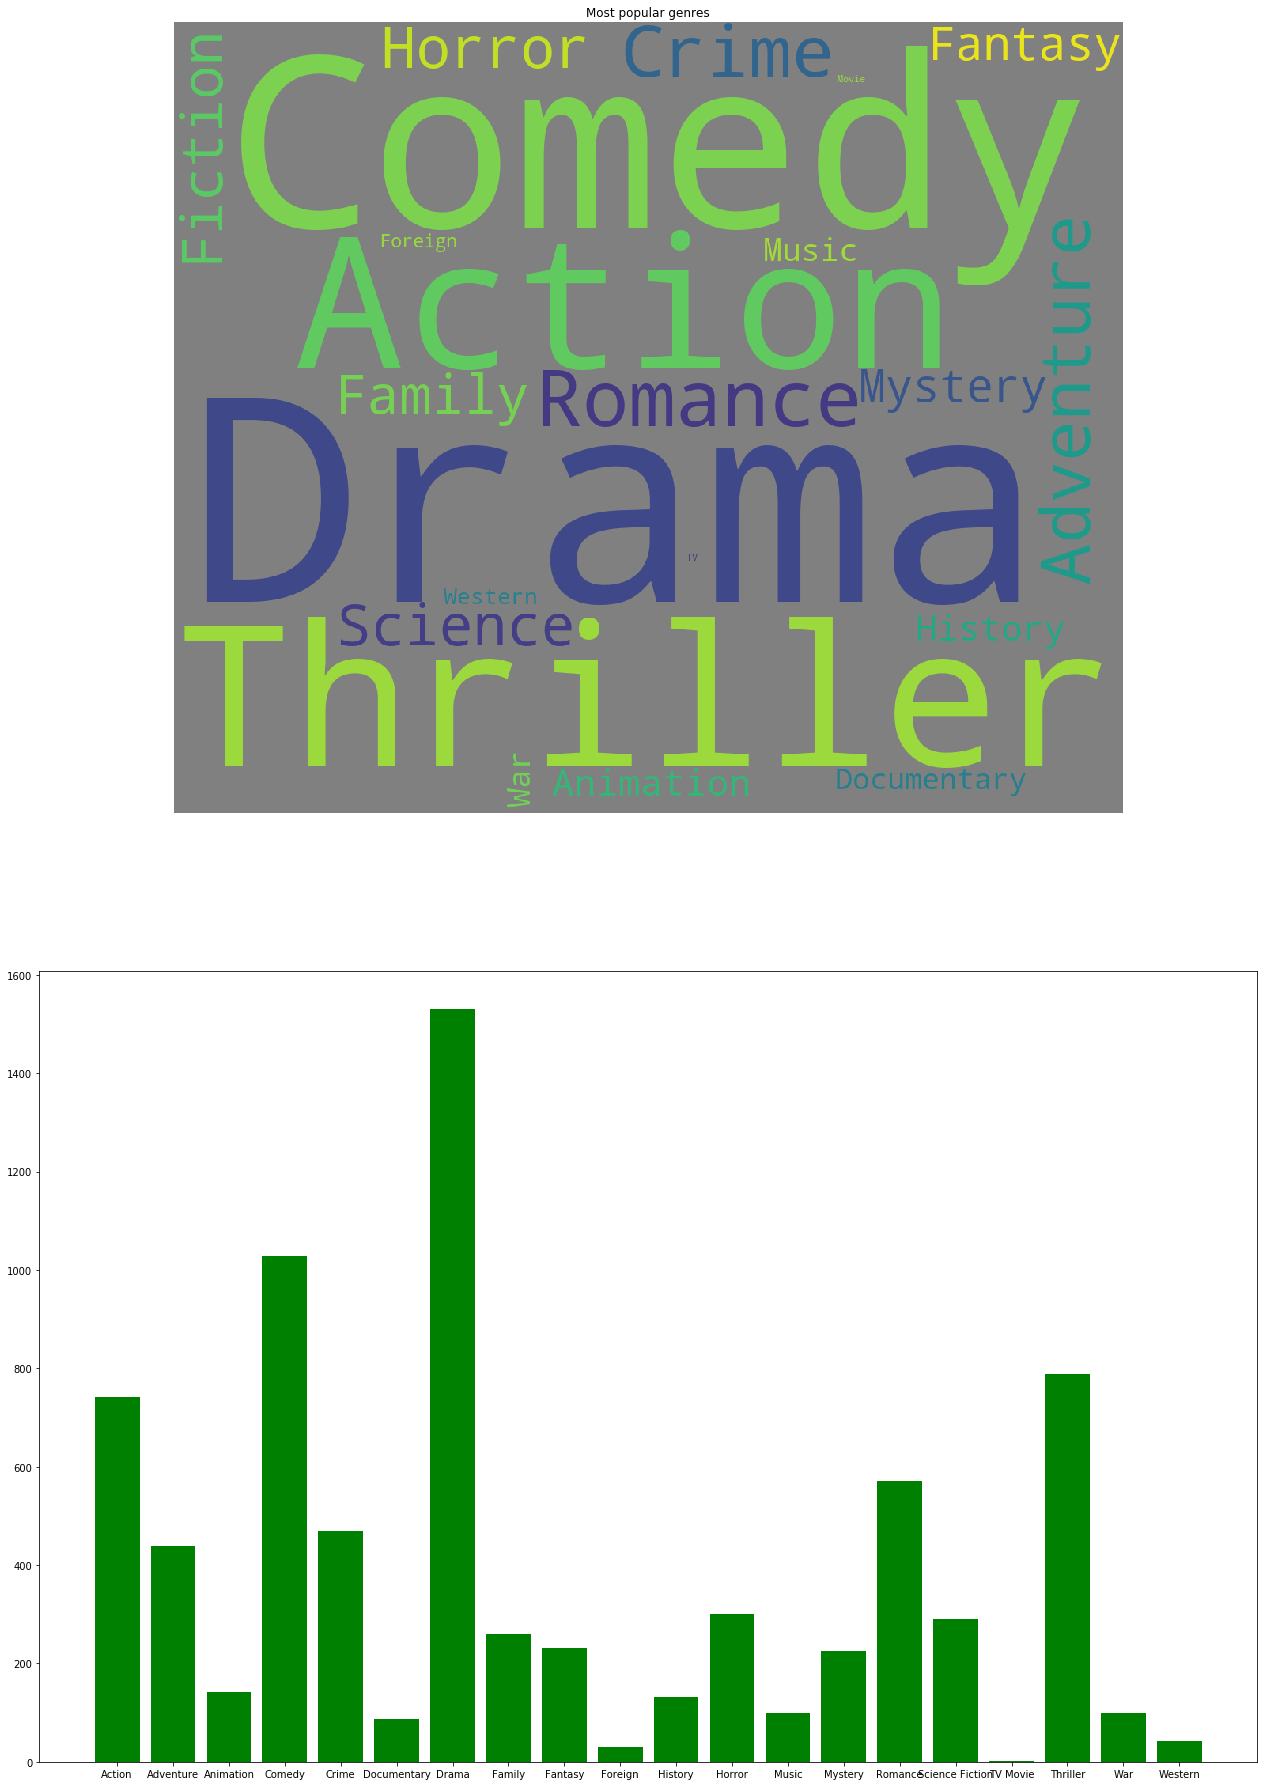

In [7]:
from wordcloud import WordCloud

plt.figure(figsize = (48, 32))
text = ' '.join([i for i in genre_names_with_repetions])

wordcloud = WordCloud(max_font_size=None, background_color='grey', collocations=False,
                      width=1200, height=1000).generate(text)
plt.subplot(2, 2, 1)
plt.imshow(wordcloud)
plt.title('Most popular genres')
plt.axis("off")

genre_names_popularity = {}
for genre in genre_names_with_repetions:
    if genre in genre_names_popularity.keys():
        continue
    genre_names_popularity[genre] = genre_names_with_repetions.count(genre)

plt.subplot(2, 2, 3)   
plt.bar(genre_names_popularity.keys(), genre_names_popularity.values(), color='g')

plt.show()

We can see that genres such like "TV Movie", "Foreign", "Western" and "Documentary" have very few appearences in comparison to other genres. We think it is safe to identify those genres as "outliers", in a sense that there is not enough data in the training set to rely on, when trying to find a difference between a movie that does belong to the "TV Movie" genre, for example, and another that doesn't.
In fact, there is only one movie that belongs to this genre, and this might be an enough of a reason for our model to determine the revenue of any movie that belongs to this genre, although it can not learn much about movies from this genre based only a single data point.

So in order to remain on the safe side and not to over-fit our model, we will create the new dummy features based only on genres that have more than 100 appearences. Other genres won't be taken into consideration for creating our model.

In [8]:
MOST_POPULAR_GENRES = [genre for genre in genre_names_popularity.keys() if genre_names_popularity[genre]>=100]
def convert_genre_feature_to_dummy_features(df):
    for genre_name in MOST_POPULAR_GENRES:
        df["genre_name_"+genre_name] = [1 if genre_name in str(l) else 0
                                           for l in df["genres"]]
        
convert_genre_feature_to_dummy_features(train_set)
convert_genre_feature_to_dummy_features(test_set)
train_set.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_name_Mystery,genre_name_Romance,genre_name_History,genre_name_Family,genre_name_Fantasy,genre_name_Horror,genre_name_Crime,genre_name_Drama,genre_name_Science Fiction,genre_name_Animation,genre_name_Music,genre_name_Adventure,genre_name_Action,genre_name_Comedy,genre_name_War,genre_name_Thriller
0,1,[{u'backdrop_path': u'/noeTVcgpBiD48fDjFVic1Vz...,14000000,"[{u'id': 35, u'name': u'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{u'name': u'Paramount Pictures', u'id': 4}, {...","[{u'iso_3166_1': u'US', u'name': u'United Stat...",2/20/15,93.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{u'id': 4379, u'name': u'time travel'}, {u'id...","[{u'name': u'Rob Corddry', u'gender': 2, u'cha...","[{u'name': u'Kelly Cantley', u'gender': 0, u'd...",12314651,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,[{u'backdrop_path': u'/zSEtYD77pKRJlUPx34BJgUG...,40000000,"[{u'id': 35, u'name': u'Comedy'}, {u'id': 18, ...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{u'name': u'Walt Disney Pictures', u'id': 2}]","[{u'iso_3166_1': u'US', u'name': u'United Stat...",8/6/04,113.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{u'id': 2505, u'name': u'coronation'}, {u'id'...","[{u'name': u'Anne Hathaway', u'gender': 1, u'c...","[{u'name': u'Garry Marshall', u'gender': 2, u'...",95149435,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0


We can see for example, the first two movies have the correct vectors to descripe their genres.


Another interesting aspect to view the "genre" feature from is the number of genres for each movie.
To demonstrate that let's add this feature to our data and plot the relation between the number of generes and the total revenue.

Text(0.5,1,u'# of genres vs revenue')

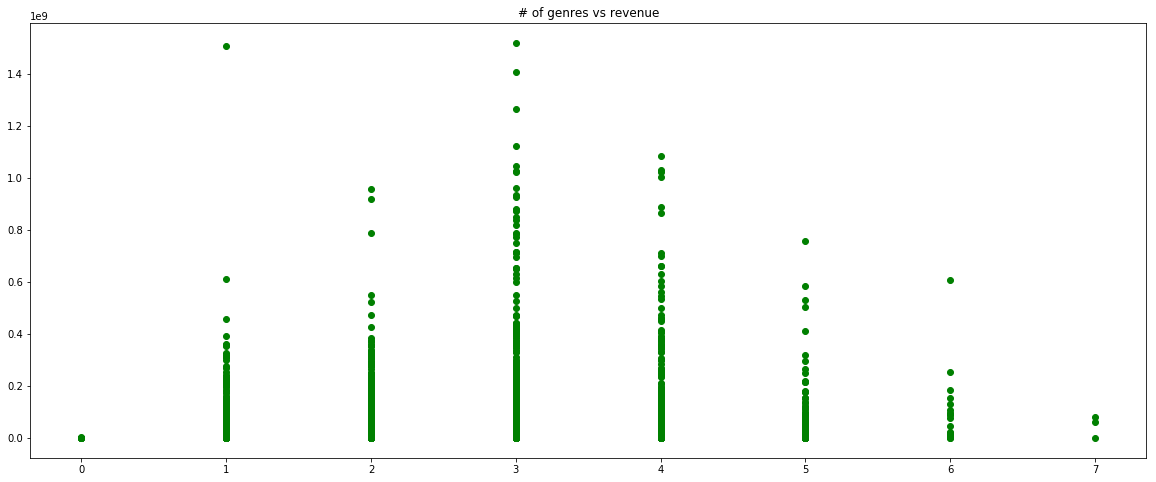

In [9]:
train_set["number_of_genres"] = [len(l) for l in train_set["genres"]]

plt.figure(figsize=(20, 8))
plt.scatter(train_set['number_of_genres'], train_set['revenue'], color="g")
plt.title('# of genres vs revenue')

It appears there is some kind of a second order relation between this new feature and the revenue. No reason to remove it. We will also construct this feature for the test set.

In [10]:
test_set["number_of_genres"] = [len(l) for l in test_set["genres"]]

Finally, we can remove the the "genres" column.

In [11]:
train_set.drop(['genres'], axis=1, inplace=True)
test_set.drop(['genres'], axis=1, inplace=True)
train_set.head(2)

,id,belongs_to_collection,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_name_Mystery,genre_name_Romance,genre_name_History,genre_name_Family,genre_name_Fantasy,genre_name_Horror,genre_name_Crime,genre_name_Drama,genre_name_Science Fiction,genre_name_Animation,genre_name_Music,genre_name_Adventure,genre_name_Action,genre_name_Comedy,genre_name_War,genre_name_Thriller,number_of_genres
0,1,[{u'backdrop_path': u'/noeTVcgpBiD48fDjFVic1Vz...,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{u'name': u'Paramount Pictures', u'id': 4}, {...","[{u'iso_3166_1': u'US', u'name': u'United Stat...",2/20/15,93.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{u'id': 4379, u'name': u'time travel'}, {u'id...","[{u'name': u'Rob Corddry', u'gender': 2, u'cha...","[{u'name': u'Kelly Cantley', u'gender': 0, u'd...",12314651,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2,[{u'backdrop_path': u'/zSEtYD77pKRJlUPx34BJgUG...,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{u'name': u'Walt Disney Pictures', u'id': 2}]","[{u'iso_3166_1': u'US', u'name': u'United Stat...",8/6/04,113.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{u'id': 2505, u'name': u'coronation'}, {u'id'...","[{u'name': u'Anne Hathaway', u'gender': 1, u'c...","[{u'name': u'Garry Marshall', u'gender': 2, u'...",95149435,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,4


#### ii. Spoken_languages feature

Much like to the "generes" feature, the values here are also lists of dictionaries, where each dictionary has the language and an abreviation. for example, let's have a look at some data point's value fo this featue:

In [12]:
test_set["spoken_languages"][1]

[{'iso_639_1': 'en', 'name': 'English'}]

We will be dealing with this feature in a very similar way to the way we dealt with "genres" feature.
Let's first look at the popularities of each language

In [13]:
spoken_languages_with_repetions = list(x["name"] for l in train_set["spoken_languages"] for x in l)
for lang in spoken_languages_with_repetions:
    print(lang)

English
English
English
English
हिन्दी
한국어/조선말
English
English
العربية
English
English
English
English
English
English
English
Pусский
English
svenska
Srpski
English
Pусский
English
Deutsch
English
English
Français
Italiano
English
English
English
English
English
Français
Italiano
English
English
English
English
日本語
English
English
Français
Français
English
العربية
English
Français
Deutsch
עִבְרִית
日本語
Português
Latin
English
Français
日本語
普通话
English
普通话
Pусский
English
English
한국어/조선말
Français
English
日本語
Español
English
Français
Español
English
English
Français
English
English
English
Italiano
Español
English
Español
English
English
English
Nederlands
English
Italiano
English
English
English
English
English
Français
English
English
English
Français
English
Français
English
Italiano
English
English
English
Español
English
English
广州话 / 廣州話
普通话
English
English
日本語
English

Español
English
Český
English
English
English
தமிழ்
తెలుగు
English
English
Deutsch
English
Español
English
English

English
Français
العربية
English
Français
Italiano
English
English
Français
Italiano
English
English
Français
English
Español
हिन्दी
English
Español
English
English
English
English
English
Italiano
English
Latin
English
English
Français
Pусский
Español
English
Français
Español
English
English
English
English
English
Magyar
English
English

English
Italiano
English
English
Deutsch
日本語
Italiano
Deutsch
English
日本語
English
English
English
Français
English
Dansk
English
English
English
Português
English
हिन्दी
English
English
English
English
English
Latin
Español
English
English
English
English
Español
English
தமிழ்
English
English
English
English
English
English
العربية
English
日本語
svenska
English
English
English
English
English
English
English
English
עִבְרִית
العربية
Deutsch
English
Español
English
Français
Magyar
English
Italiano
English
English
English
English
English
English
English
한국어/조선말
Latin
English
Español
English
Français
Pусский
English
English
English
العربية
Deutsch
English

English
日本語
Pусский
普通话
Deutsch
Français
English
Español
English
English
English
Español
English
English
Italiano
Türkçe
English
English
Français
English
English
Français
Deutsch
English
English
Deutsch
Français
Latin
العربية
ελληνικά
English
English
English

English
हिन्दी
தமிழ்
English
English
English
Italiano
English
English
English
Français
Español
Český
English
English
English
English
Deutsch
English
English
Español
广州话 / 廣州話
English
English
English
Español
English
Français
English
English
English
हिन्दी
English
English
English
English
English
English
Français
Italiano
English
English
English
English
Hrvatski
English
日本語
हिन्दी
English
Français
日本語
English
Español
English
English
Français
svenska
தமிழ்
Português
English
Italiano
English
English
日本語
English
English
English
한국어/조선말
English
English
English
English
English
English
English
English
English
Français
English
한국어/조선말
English
English
English
Português
Español
English
English
Français
Deutsch
English
English
Español
English


This time, it will be easier to deal with the abreviations since they are all written with english letters.

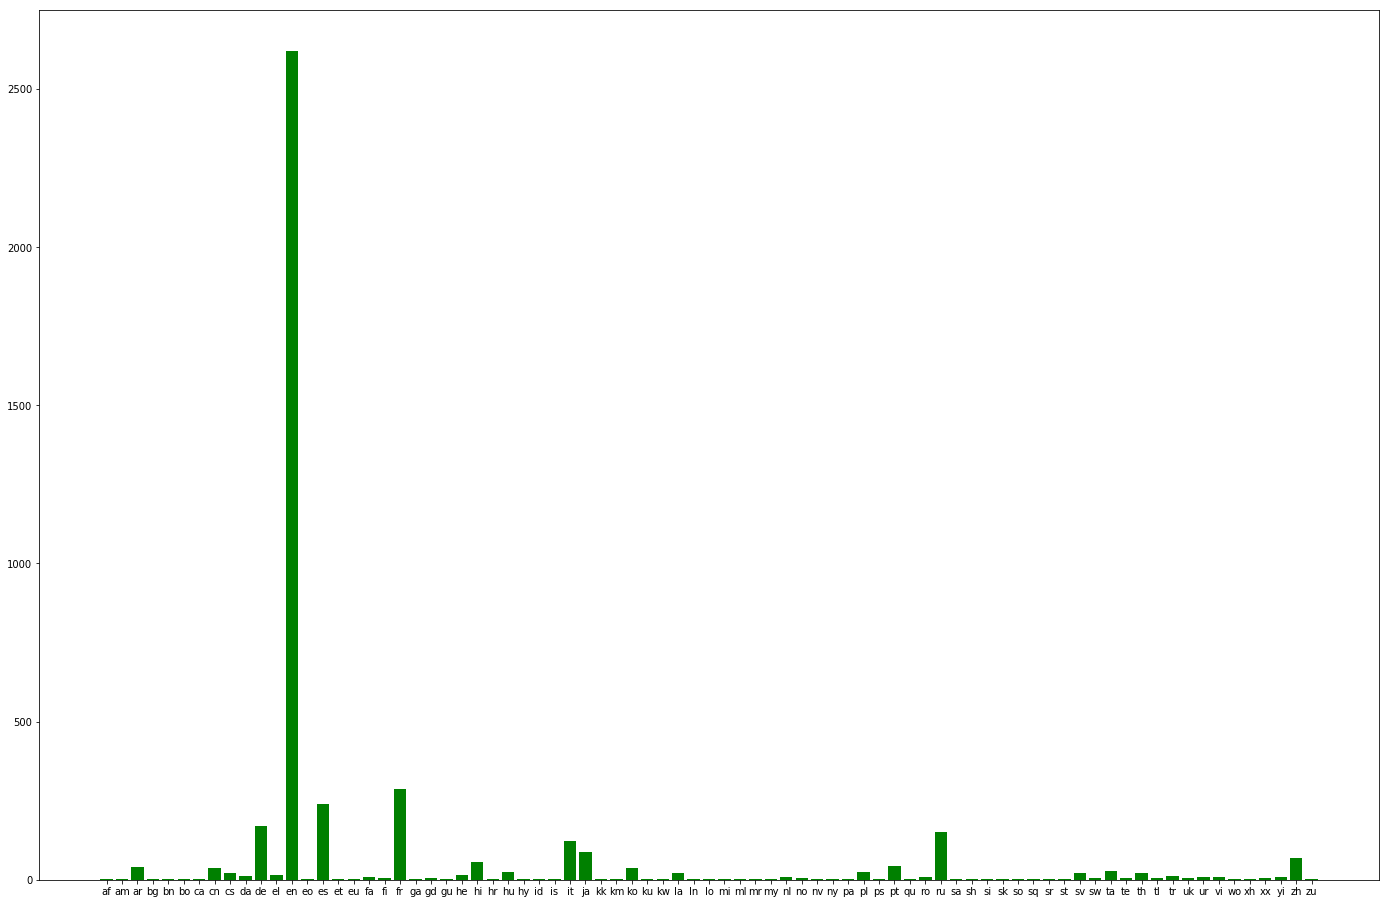

In [14]:
spoken_languages_with_repetions = list(x["iso_639_1"] for l in train_set["spoken_languages"] for x in l)
plt.figure(figsize = (24, 16))

spoken_languages_popularity = {}
for lang in spoken_languages_with_repetions:
    if lang in spoken_languages_popularity.keys():
        continue
    spoken_languages_popularity[lang] = spoken_languages_with_repetions.count(lang)

plt.bar(spoken_languages_popularity.keys(), spoken_languages_popularity.values(), color='g')

plt.show()

From the looks of it English is a much more popular language amongst movies than all other languages, therefore it will be interesting to divide the movies into two sets: English movies and "foreign" movies (meaning movies that don't have english as a spoken language).

Text(0.5,1,u'Spoken language (English=1/Foreign=0) vs revenue')

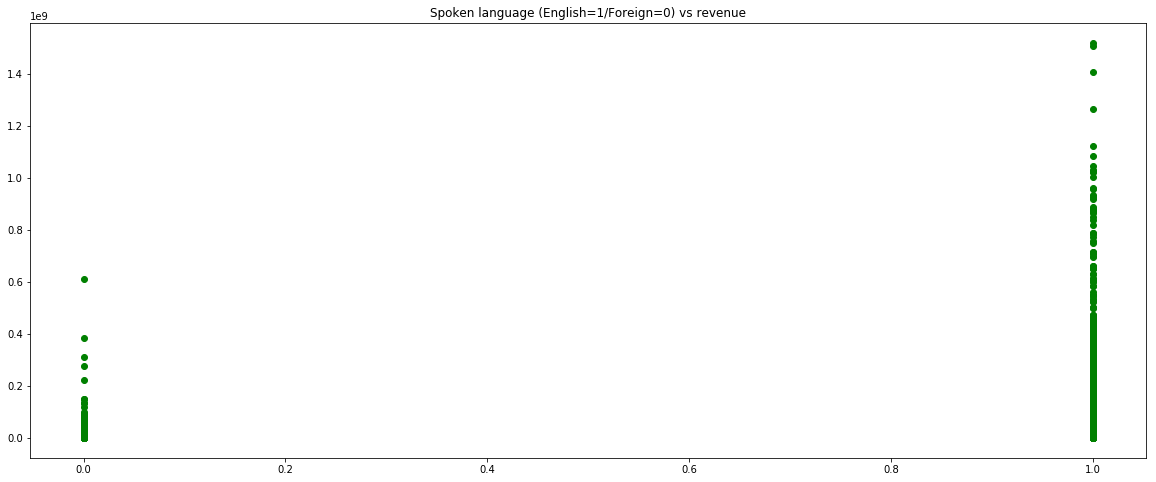

In [15]:
train_set["spoken_english"] = [1 if "English" in str(l) else 0 for l in train_set["spoken_languages"]]
plt.figure(figsize=(20, 8))
plt.scatter(train_set['spoken_english'], train_set['revenue'], color="g")
plt.title('Spoken language (English=1/Foreign=0) vs revenue')

This plot supports our claim, and that is that it is very much interesting whether a movie has English as a spoken language in it or not. It also makes some sense, because English is the universal language which helps a movie get more global attention/popularity and therefore greater revenues.

In [16]:
test_set["spoken_english"] = [1 if "English" in str(l) else 0 for l in test_set["spoken_languages"]]

Another interesting perspective is -just like in the "Generes" feature- the number of spoken languages per each movie. Like we did before, we will check the relevance of the number of spoken languages by plotting it against the revenue.

Text(0.5,1,u'# of spoken languages vs revenue')

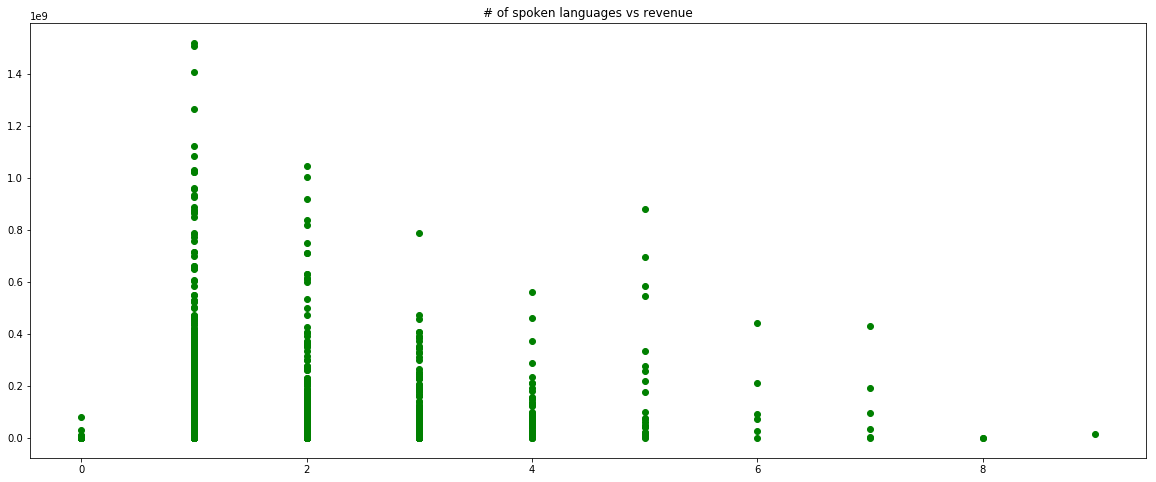

In [17]:
train_set["number_of_spoken_languages"] = [len(l) for l in train_set["spoken_languages"]]

plt.figure(figsize=(20, 8))
plt.scatter(train_set['number_of_spoken_languages'], train_set['revenue'], color="g")
plt.title('# of spoken languages vs revenue')

It is clear that there is some linear correlation between the number of spoken languages in a film and its total revenue (The less spoken languages -excluding the silent movies- the greater the revenue) . We should probably keep this new feature (and add it to the test set of course).

In [18]:
test_set["number_of_spoken_languages"] = [len(l) for l in test_set["spoken_languages"]]

And finally, we can remove the original "spoken_languages" feature.

In [19]:
train_set.drop(['spoken_languages'], axis=1, inplace=True)
test_set.drop(['spoken_languages'], axis=1, inplace=True)
train_set.head(2)

,id,belongs_to_collection,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,status,tagline,title,Keywords,cast,crew,revenue,genre_name_Mystery,genre_name_Romance,genre_name_History,genre_name_Family,genre_name_Fantasy,genre_name_Horror,genre_name_Crime,genre_name_Drama,genre_name_Science Fiction,genre_name_Animation,genre_name_Music,genre_name_Adventure,genre_name_Action,genre_name_Comedy,genre_name_War,genre_name_Thriller,number_of_genres,spoken_english,number_of_spoken_languages
0,1,[{u'backdrop_path': u'/noeTVcgpBiD48fDjFVic1Vz...,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{u'name': u'Paramount Pictures', u'id': 4}, {...","[{u'iso_3166_1': u'US', u'name': u'United Stat...",2/20/15,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{u'id': 4379, u'name': u'time travel'}, {u'id...","[{u'name': u'Rob Corddry', u'gender': 2, u'cha...","[{u'name': u'Kelly Cantley', u'gender': 0, u'd...",12314651,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
1,2,[{u'backdrop_path': u'/zSEtYD77pKRJlUPx34BJgUG...,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{u'name': u'Walt Disney Pictures', u'id': 2}]","[{u'iso_3166_1': u'US', u'name': u'United Stat...",8/6/04,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{u'id': 2505, u'name': u'coronation'}, {u'id'...","[{u'name': u'Anne Hathaway', u'gender': 1, u'c...","[{u'name': u'Garry Marshall', u'gender': 2, u'...",95149435,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,4,1,1


#### iii.	belongs_to_collection feature:

First thing we want to check here is whether for a specified movie, the fact of belonging to some collection would affect the revenue.

In [20]:
train_set['belongs_to_collection'][0]

[{'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg',
  'id': 313576,
  'name': 'Hot Tub Time Machine Collection',
  'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg'}]

We believe that only the name (or the id) would be relevant, So let us extract the (what we believe is) equivelant feature "collection_name"

In [21]:
train_set['collection_name'] = train_set['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)

test_set['collection_name'] = test_set['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)

Let us seperate the data into movies that do belong to some collection and movies that don't.

Text(0.5,1,u'has/ does not have collection vs revenue')

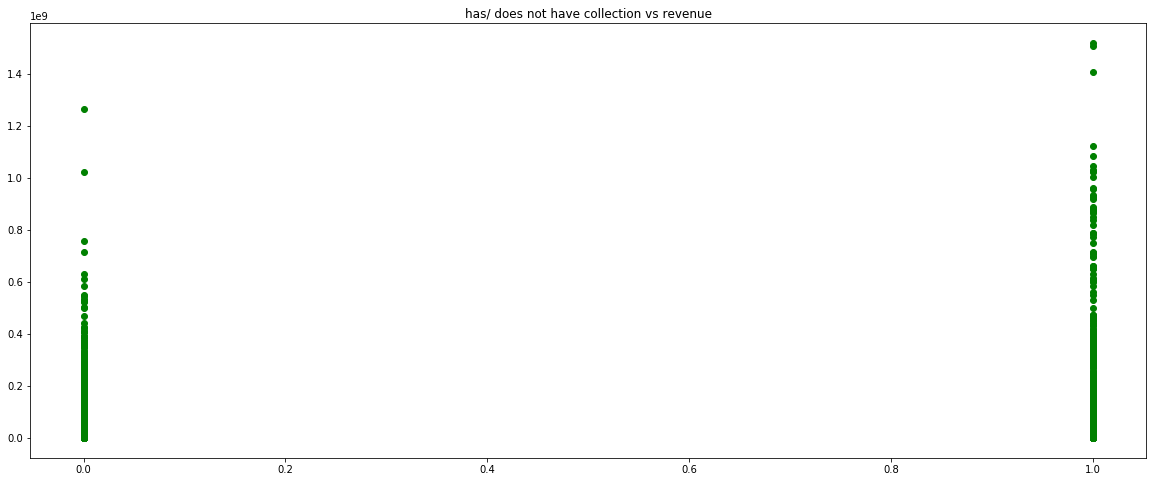

In [22]:
train_set['has_collection'] = train_set['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)
plt.figure(figsize=(20, 8))
plt.scatter(train_set['has_collection'], train_set['revenue'], color="g")
plt.title('has/ does not have collection vs revenue')


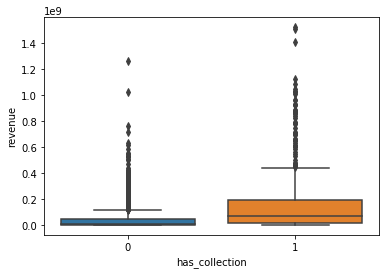

In [23]:
import seaborn as sns
#sns.catplot(x='has_collection', y='revenue', data=train_set);
sns.boxplot(x='has_collection', y='revenue', data=train_set.loc[train_set['has_collection'].isin(train_set['has_collection'].value_counts().head(10).index)]);



Depending on this box plot, it seems there is some effect of having a collection on the revenue. We can clearly see that the mean revenue for movies belonging to some collection is greater than that of those not belonging to any collection. let's apply the same transformation on the test set:

In [24]:
test_set['has_collection'] = test_set['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)


And as usual, we will remove the original feature.

In [25]:
train_set.drop(['belongs_to_collection'], axis=1, inplace=True)
test_set.drop(['belongs_to_collection'], axis=1, inplace=True)
train_set.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,status,tagline,title,Keywords,cast,crew,revenue,genre_name_Mystery,genre_name_Romance,genre_name_History,genre_name_Family,genre_name_Fantasy,genre_name_Horror,genre_name_Crime,genre_name_Drama,genre_name_Science Fiction,genre_name_Animation,genre_name_Music,genre_name_Adventure,genre_name_Action,genre_name_Comedy,genre_name_War,genre_name_Thriller,number_of_genres,spoken_english,number_of_spoken_languages,collection_name,has_collection
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{u'name': u'Paramount Pictures', u'id': 4}, {...","[{u'iso_3166_1': u'US', u'name': u'United Stat...",2/20/15,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{u'id': 4379, u'name': u'time travel'}, {u'id...","[{u'name': u'Rob Corddry', u'gender': 2, u'cha...","[{u'name': u'Kelly Cantley', u'gender': 0, u'd...",12314651,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,Hot Tub Time Machine Collection,1
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{u'name': u'Walt Disney Pictures', u'id': 2}]","[{u'iso_3166_1': u'US', u'name': u'United Stat...",8/6/04,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{u'id': 2505, u'name': u'coronation'}, {u'id'...","[{u'name': u'Anne Hathaway', u'gender': 1, u'c...","[{u'name': u'Garry Marshall', u'gender': 2, u'...",95149435,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,4,1,1,The Princess Diaries Collection,1


#### iv. budget feature:
This should be very straight forward, we expect that the higher the budget, the higher the revenues, let's verify this claim


In [26]:
test_set["budget"]

0               0
1           88000
2               0
3         6800000
4         2000000
5               0
6               0
7        30000000
8        16500000
9        90000000
10        2000000
11              0
12        5000000
13         800000
14       20000000
15              0
16       36000000
17      100000000
18              0
19      200000000
20       30000000
21       20000000
22              0
23       27000000
24              0
25       35000000
26        5000000
27       44000000
28         500000
29       35000000
          ...    
4368     25000000
4369     30000000
4370            0
4371     55000000
4372    170000000
4373      1800000
4374     16000000
4375            0
4376      4000000
4377     13200000
4378     42000000
4379            0
4380            0
4381       600000
4382       800000
4383     10000000
4384     15000000
4385     12000000
4386            0
4387            0
4388      1000000
4389            0
4390            0
4391     10000000
4392    15

Text(0.5,1,u'budget vs revenue')

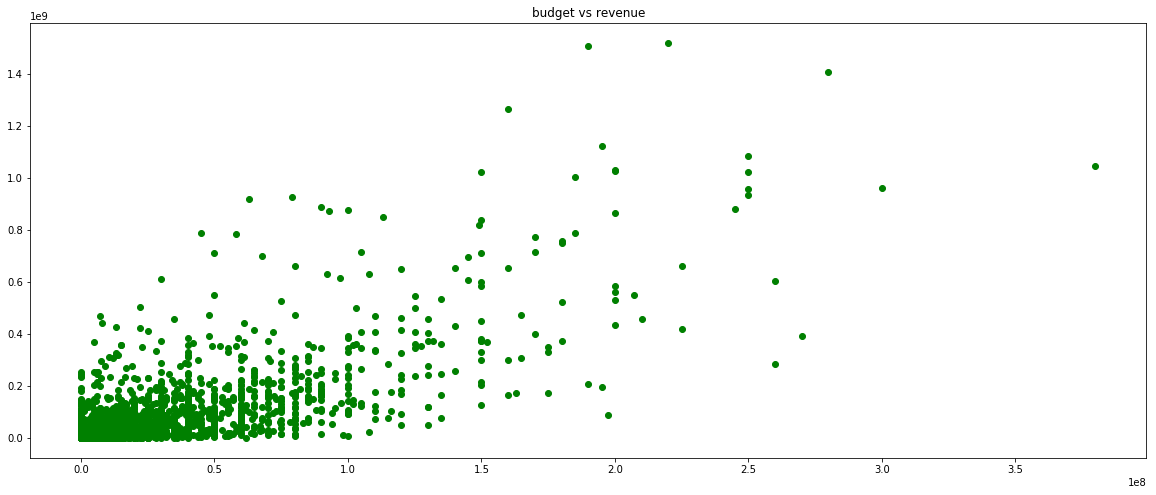

In [27]:
plt.figure(figsize=(20, 8))
plt.scatter(train_set['budget'], train_set['revenue'], color="g")
plt.title('budget vs revenue')

Let's try and bring these numbers down, maybe it'll prove to be more useful...

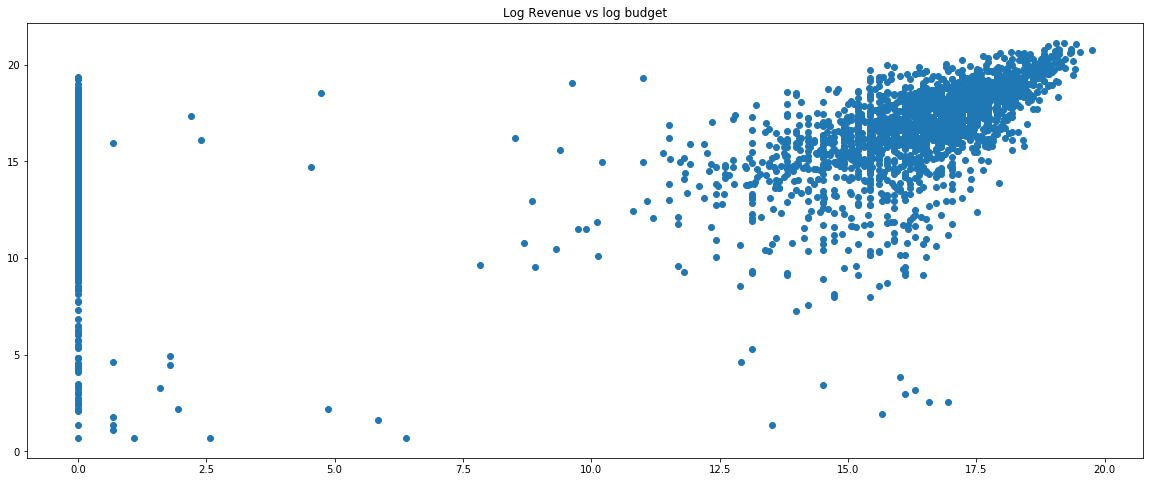

In [28]:
plt.figure(figsize=(20, 8))
plt.scatter(np.log1p(train_set['budget']), np.log1p(train_set['revenue']))
plt.title('Log Revenue vs log budget');

This does look a little more convincing than the previous plot. let's add those features (log of budget and log of revenue)

In [29]:
train_set['log_budget'] = np.log1p(train_set['budget'])
test_set['log_budget'] = np.log1p(test_set['budget'])

In [30]:
train_set["log_revenue"] = np.log1p(train_set['revenue'])

#### v. Keywords feature:

In [31]:
train_set["Keywords"]

0       [{u'id': 4379, u'name': u'time travel'}, {u'id...
1       [{u'id': 2505, u'name': u'coronation'}, {u'id'...
2       [{u'id': 1416, u'name': u'jazz'}, {u'id': 1523...
3       [{u'id': 10092, u'name': u'mystery'}, {u'id': ...
4                                                      {}
5                                                      {}
6                                                      {}
7       [{u'id': 917, u'name': u'journalism'}, {u'id':...
8       [{u'id': 2041, u'name': u'island'}, {u'id': 44...
9       [{u'id': 11800, u'name': u'mockumentary'}, {u'...
10      [{u'id': 240, u'name': u'underdog'}, {u'id': 2...
11      [{u'id': 5801, u'name': u'nerd'}, {u'id': 6876...
12      [{u'id': 255, u'name': u'male nudity'}, {u'id'...
13      [{u'id': 3605, u'name': u'baseball bat'}, {u'i...
14      [{u'id': 476, u'name': u'self-fulfilling proph...
15      [{u'id': 379, u'name': u'skinhead'}, {u'id': 7...
16      [{u'id': 1562, u'name': u'hostage'}, {u'id': 2...
17      [{u'id

We will deal with the Keywords in a similar way we dealt with the Generes feature (afterall, they should have a very similar effect on the target);
Transform only the most popular ones into dummy features, and checxk if there is some relation between the number of keywords for a film to its revenues.

In [32]:
keywords_with_repetions = list(x["name"] for l in train_set["Keywords"] for x in l)
print(len(keywords_with_repetions))

21680


We certainly don't want all 21680 keywords, let's have a look at their popularity and decide which keywords we do want in our data

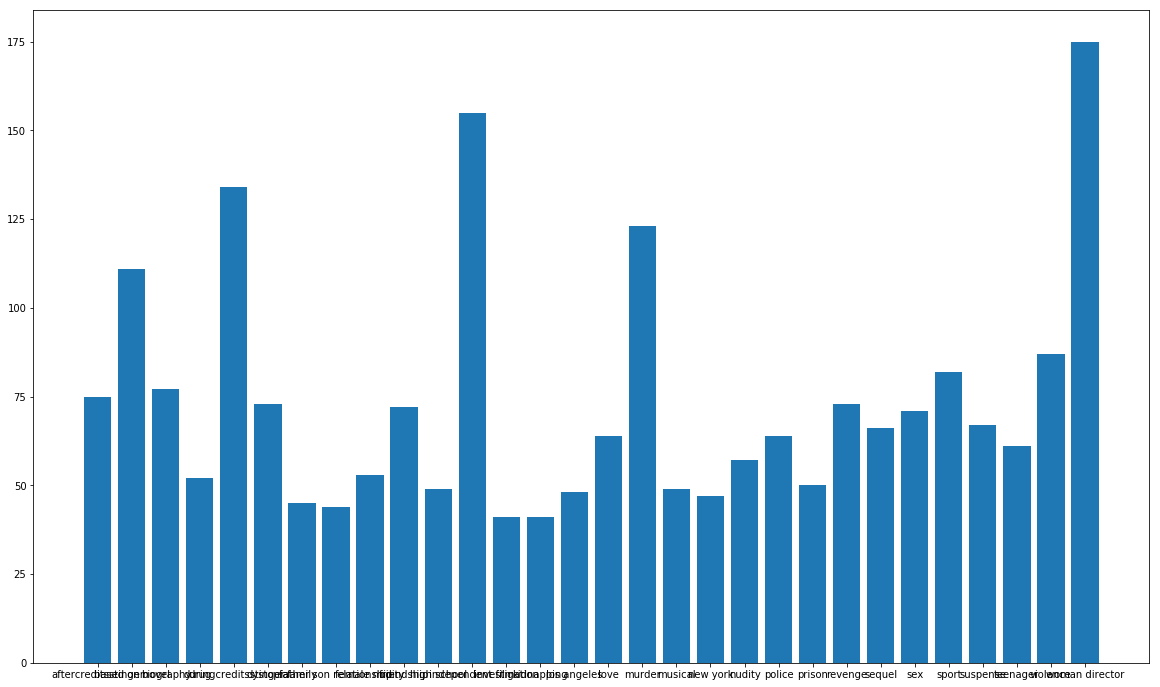

In [33]:
from collections import Counter
# decoding and encoding in order to ignore non ascii names
keywords_popularity = Counter([kw.decode("utf-8","ignore").encode("ascii", "ignore") for kw in keywords_with_repetions])
popular_kw = [(x, keywords_popularity[x]) for x in keywords_popularity if keywords_popularity[x] > 40 ]
unpopular_kw = [(x, keywords_popularity[x]) for x in keywords_popularity if keywords_popularity[x] < 10 ]


plt.figure(figsize=(20, 12))
plt.bar([k[0] for k in popular_kw], [k[1] for k in popular_kw])
plt.show()




In [39]:
#let's just check how many unpopular keywords there are, only for comparison purpuses
print("number of unpopular keywords: {}".format(len(unpopular_kw)))

number of unpopular keywords: 7040


We'll create new dummy feature for all the popular keywords.
We could see from the graphs above that there are much less keywords with 40 - 175 appearances than there are keywords with less than 10 appearences. This tells us that there are few keywords that are very popular (and therefore might be important for classification) and many (many) features that are not popular at all, which can result in overfitting.

In [37]:
def convert_keywords_feature_to_dummy_features(df):
    for kw in popular_kw:
        df["kw_"+kw[0]] = [1 if kw[0] in str(l) else 0
                                           for l in df["Keywords"]]
        
convert_keywords_feature_to_dummy_features(train_set)
convert_keywords_feature_to_dummy_features(test_set)
train_set.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,status,tagline,title,Keywords,cast,crew,revenue,genre_name_Mystery,genre_name_Romance,genre_name_History,genre_name_Family,genre_name_Fantasy,genre_name_Horror,genre_name_Crime,genre_name_Drama,genre_name_Science Fiction,genre_name_Animation,genre_name_Music,genre_name_Adventure,genre_name_Action,genre_name_Comedy,genre_name_War,genre_name_Thriller,number_of_genres,spoken_english,number_of_spoken_languages,collection_name,has_collection,log_budget,log_revenue,kw_prison,kw_father son relationship,kw_love,kw_investigation,kw_based on novel,kw_sex,kw_drug,kw_independent film,kw_musical,kw_nudity,kw_sport,kw_family,kw_new york,kw_sequel,kw_duringcreditsstinger,kw_revenge,kw_high school,kw_police,kw_violence,kw_aftercreditsstinger,kw_biography,kw_dystopia,kw_los angeles,kw_kidnapping,kw_murder,kw_teenager,kw_woman director,kw_suspense,kw_friendship,kw_female nudity
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{u'name': u'Paramount Pictures', u'id': 4}, {...","[{u'iso_3166_1': u'US', u'name': u'United Stat...",2/20/15,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{u'id': 4379, u'name': u'time travel'}, {u'id...","[{u'name': u'Rob Corddry', u'gender': 2, u'cha...","[{u'name': u'Kelly Cantley', u'gender': 0, u'd...",12314651,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,Hot Tub Time Machine Collection,1,16.454568,16.326300,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{u'name': u'Walt Disney Pictures', u'id': 2}]","[{u'iso_3166_1': u'US', u'name': u'United Stat...",8/6/04,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{u'id': 2505, u'name': u'coronation'}, {u'id'...","[{u'name': u'Anne Hathaway', u'gender': 1, u'c...","[{u'name': u'Garry Marshall', u'gender': 2, u'...",95149435,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,4,1,1,The Princess Diaries Collection,1,17.504390,18.370959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Cast Feature:
let's first have a look at what info is presented in the values of this feature

In [41]:
train_set["cast"][0]

[{'cast_id': 4,
  'character': 'Lou',
  'credit_id': '52fe4ee7c3a36847f82afae7',
  'gender': 2,
  'id': 52997,
  'name': 'Rob Corddry',
  'order': 0,
  'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'},
 {'cast_id': 5,
  'character': 'Nick',
  'credit_id': '52fe4ee7c3a36847f82afaeb',
  'gender': 2,
  'id': 64342,
  'name': 'Craig Robinson',
  'order': 1,
  'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'},
 {'cast_id': 6,
  'character': 'Jacob',
  'credit_id': '52fe4ee7c3a36847f82afaef',
  'gender': 2,
  'id': 54729,
  'name': 'Clark Duke',
  'order': 2,
  'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'},
 {'cast_id': 7,
  'character': 'Adam Jr.',
  'credit_id': '52fe4ee7c3a36847f82afaf3',
  'gender': 2,
  'id': 36801,
  'name': 'Adam Scott',
  'order': 3,
  'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'},
 {'cast_id': 8,
  'character': 'Hot Tub Repairman',
  'credit_id': '52fe4ee7c3a36847f82afaf7',
  'gender': 2,
  'id': 54812,
  'name': 'Chevy Chase',
  'order': 4,
  'prof

We believe the possibly useful aspects are, like before, the number of cast members per film, weather or not a popular cast member is in the film, whether or not a popular charachter is in the film, the number of male cast members and the number of female cast members. (males are gender 2 and females are gender 1, 0 is unspecified according to here: https://www.themoviedb.org/talk/59bf8557c3a3682ff80105d0?language=en-US).
